# 1. Newsgroup dataset

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. In this assignment we are going to use a **subset** of this dataset to learn a bit about unsupervised learning methods in machine learning. To load this dataset we are going to use scikit-learn library which you have worked with a couple of times through semester.

# 2. Loading data and preprocessing

To ensure that your results are reproducable make sure to set the seed value.

In [6]:
import numpy as np

SEED = 123
np.random.seed(SEED)

## 2.1. downloading and loading data

You can download both training set and test set separately using sklearn apis. [Here](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) you can find sample codes for loading dataset.

In [7]:
from sklearn.datasets import fetch_20newsgroups

# YOUR CODE HERE

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

## 2.2 filtering target classes

Explore dataset and get familiar with it. Then, implement `filter_split_x_y` function which extracts `selected_targets` classes from data and splits the data into two lists of X and ys. Please don't change `selected_targets` list is this cell.


In [8]:
import numpy as np 

selected_targets = [1, 7, 10, 13, 15, 16, 17]

def filter_split_X_y(raw_data, selected_targets):
    """
    This function inputs a newsgroup dataset and filters it based on your selected labels
    then returns two lists of datapoints and labels separately
    
    """
    # YOUR CODE HERE
    datapoints = []
    labels = []
    for idx in range(len(raw_data.target)):
      if raw_data.target[idx] in selected_targets:
        datapoints.append(idx)
        labels.append(raw_data.target[idx])
        
    return datapoints, labels 

train_x, train_y = filter_split_X_y(newsgroups_train, selected_targets)
test_x, test_y = filter_split_X_y(newsgroups_test, selected_targets)


**2.2.1.** Print the name of classes in your training set along with `selected_targets` you can use `target_names` attribute of `newsgroups_train`. Make sure you include this output in your PDF report.

In [5]:
from pprint import pprint
for i in selected_targets:
  print(newsgroups_train.target_names[newsgroups_train.target[i]])

comp.sys.mac.hardware
comp.sys.ibm.pc.hardware
rec.motorcycles
sci.space
alt.atheism
comp.graphics
rec.autos


## 2.3. vectorizing documents

There are several ways that one can use to vectorize a whole document. In this programming assignment we are going to use **TF-IDF** method. Please go ahead and watch [this short video](https://www.youtube.com/watch?v=D2V1okCEsiE) to understand how tf-idf works and then answer the following questions.

**2.3.1.** What does TF-IDF stand for? **TF is a short word for term frequency, which indicates how often a particular word appears in a document. Higher value indicates the importance of the word in the document.**<br> 
**2.3.2.** Why don't we only use term frequency of the words in a document as its feature vector? what is the benefit of adding inverse document frequency? **The importance of words decrease if the words are in other documents too. Therefore, we have to multiply TF and IDF(inverse document frequency) to calculate if words are not common in other documents and appears frequently in those documents** <br>
**2.3.3.** Calculate the tf-idf vectors of the following two documents, assuming this is the entire corpus:
[Documents](tfidf.png)
**Doc1 - 'a' = 0.12, 'sample' = 0.06
Doc2 - 'another' = 0.08, 'example' = 0.129**

Now we are going to use scikit-learn to calculate the tf-idf vectors of each document in our twenty newgroups dataset. Write a function that accepts both `train_x` and `test_x` and returns the tf-idf vectors of them in numpy format.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_dataset(train_x, test_x):
    """
    returns vectorized numpy array of training and test set
    """
    vectorizer = TfidfVectorizer()
    # YOUR CODE HERE
    
    tfid = vectorizer.fit(newsgroups_train.data[i] for i in train_x)
    train_vec = tfid.transform(newsgroups_train.data[i] for i in train_x)
    test_vec = tfid.transform(newsgroups_test.data[i] for i in test_x)

    train_vec = train_vec.toarray()
    test_vec = test_vec.toarray()

    return train_vec, test_vec
    
train_vec, test_vec = vectorize_dataset(train_x, test_x)
print(train_vec.shape, test_vec.shape)

(4081, 56153) (2718, 56153)


# 3. dimension reduction

In the previous section we built features vectors for each of the documents. However, these feature vectors are highly sparse and are not easy to cluster or visualize.

## 3.1. Sparsity

Answer these questions to understand the sparsity of these vectors:

**3.1.1** Count the number of non-zeros in each row of the `train_vec` matrix.<br>
**3.1.2** What is the average number non zero elements in each row? <br>
**3.1.3** On average what percentage of elements in each row have non-zero elements?<br>

In [6]:
#code for 3.1.1

non_zeros_per_row = []

for i in range(len(train_vec)):
  non_zeros=0
  for j in range(len(train_vec[i])):
    if train_vec[i][j] != 0 :
      non_zeros+=1
  non_zeros_per_row.append(non_zeros)
  print(i+1,'row:',non_zeros)



1 row: 89
2 row: 94
3 row: 217
4 row: 70
5 row: 190
6 row: 636
7 row: 111
8 row: 99
9 row: 221
10 row: 96
11 row: 155
12 row: 281
13 row: 142
14 row: 379
15 row: 155
16 row: 129
17 row: 302
18 row: 214
19 row: 75
20 row: 70
21 row: 119
22 row: 1163
23 row: 188
24 row: 110
25 row: 156
26 row: 190
27 row: 308
28 row: 127
29 row: 186
30 row: 119
31 row: 176
32 row: 84
33 row: 105
34 row: 35
35 row: 94
36 row: 112
37 row: 209
38 row: 128
39 row: 109
40 row: 130
41 row: 251
42 row: 122
43 row: 369
44 row: 44
45 row: 120
46 row: 140
47 row: 309
48 row: 102
49 row: 82
50 row: 324
51 row: 208
52 row: 151
53 row: 204
54 row: 80
55 row: 142
56 row: 204
57 row: 98
58 row: 113
59 row: 89
60 row: 126
61 row: 152
62 row: 285
63 row: 178
64 row: 96
65 row: 104
66 row: 184
67 row: 103
68 row: 84
69 row: 99
70 row: 425
71 row: 97
72 row: 362
73 row: 359
74 row: 206
75 row: 191
76 row: 66
77 row: 67
78 row: 127
79 row: 194
80 row: 237
81 row: 41
82 row: 39
83 row: 170
84 row: 176
85 row: 271
86 row: 143

In [8]:
#code for 3.1.2
sum=0
length = len(train_vec)
for i in non_zeros_per_row:
  sum+=i

average = sum / length
print(average)

170.56187209017398


In [9]:
#code for 3.1.3
sum = 0 
for i in non_zeros_per_row:
  p = (i/length * average)
  sum += p

avg = sum / length 
print(avg)

7.128486207033781


## 3.2. SVD

Use `TruncatedSVD` module in scikit-learn to perform SVD on the dataset. Reduce your dimensions to 3 and perfomr SVD for 100 iterations (**note: the number of iterations parameter is a special component for an alternative way to solve SVD that we did not study in class. You do not need to know what it means**). Make sure to use the random seed given at the beginning of the notebook.

**Note: you should only fit your SVD/UMAP models on train data**

**3.2.1.** What portion of the variance in your dataset is explained by each of the SVD dimensions?

In [10]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

def fit_and_transform_svd(train_vec, test_vec):
    """
    trains a svd model and generate reduced dimension vectors from training and test dataset
    returns: 2 numpy arrays of size <number of documents>*3
    """
    # YOUR CODE
    train_vec = csr_matrix(train_vec)
    test_vec = csr_matrix(test_vec)
    svd = TruncatedSVD(n_components=3,n_iter=100,random_state=SEED).fit(train_vec)
    train_svd = svd.transform(train_vec)
    test_svd = svd.transform(test_vec)
    print(svd.explained_variance_ratio_)
    return train_svd, test_svd

train_svd, test_svd = fit_and_transform_svd(train_vec, test_vec)

[0.01618638 0.00617073 0.00540306]


## 3.3 UMAP

UMAP is another dimensionality reduction method that works in a more complex way. [This video](https://www.youtube.com/watch?v=6BPl81wGGP8) explains on a high level how it performs dimension reduction.
Apply UMAP and get the embeddings for both training and test datasets. Use the previously given `random_state` and reduce dimensions to 3. Also use **cosine similarity** as the similarity metric of UMAP:

- n_components=3
- metric='cosine'
- random_state=SEED
- low_memory=True

In [5]:
!pip install umap
!pip install umap-learn

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=b20170316dd231a593d56e676dd05c5531aefb3e26e9d733778cbfb861cb9c88
  Stored in directory: /root/.cache/pip/wheels/65/55/85/945cfb3d67373767e4dc3e9629300a926edde52633df4f0efe
Successfully built umap
     |████████████████████████████████| 88 kB 3.5 MB/s 
     |████████████████████████████████| 1.1 MB 32.2 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c195216f448c89c1a2cbce7bd1f576dd29f202d9184d0666dffb4babc8d5cfcc
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=0159c5c5134490f6078c99f55810e6baecb9bf55dd78054e2d2b3cc56caaa0f5
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [110]:
import umap

def fit_and_transform_umap(train_vec, test_vec):
    # YOUR CODE
    train_vec = csr_matrix(train_vec)
    test_vec = csr_matrix(test_vec)
    Umap = umap.UMAP(n_components=3,metric='cosine', random_state=SEED, low_memory=True).fit(train_vec)
    train_umap = Umap.transform(train_vec)
    test_umap = Umap.transform(test_vec)
    return train_umap, test_umap
train_umap, test_umap = fit_and_transform_umap(train_vec, test_vec)

## 3.4. visualization

install `babyplots` library which provides some nice 3D visaulizations. Then, visualize both of embeddings (SVD and UMAP) of the **training data** using the given function. **make sure you put a screenshot of the visualizations inside your write up**. You can use it to explain your answers to the questions.

<span style="color:red"> Please don't use babyplot inside <b>jupyter lab</b> as it is still not fully supported and produces some errors </span>

Hint: you need to run the function in a separate cell to get the visualization

**3.4.1.** Based on your observation, what is the difference between SVD and UMAP embeddings? 1-2 sentences should suffice.<br>
**3.4.2.** Which one do you prefer to use for a classification task? why? 1-2 sentences should suffice <br>

In [ ]:
!pip install babyplots 

In [13]:
from babyplots import Babyplot

def visualize(datapoints, labels):
    bp = Babyplot(background_color="#ffffffff", turntable=True)
    bp.add_plot(
        datapoints,
        "pointCloud",
        "categories",
        np.array(labels).tolist(),
        {
            "colorScale": "Dark2", 
            "showLegend": True
        }
    )
    return bp

In [ ]:
visualize(train_umap, train_y)

In [ ]:
visualize(train_svd, train_y)

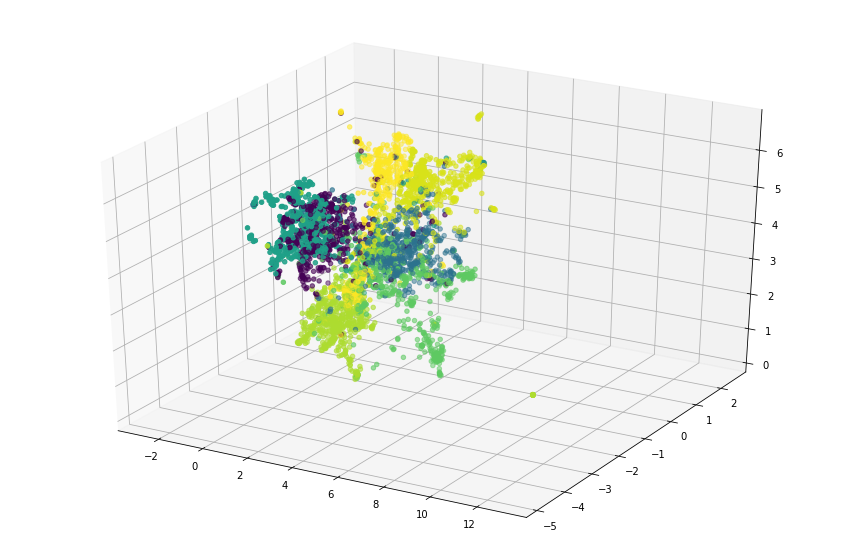

In [156]:
#babyplots not working here
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(train_umap[:,0],train_umap[:,1],train_umap[:,2],c=train_y)
plt.show()

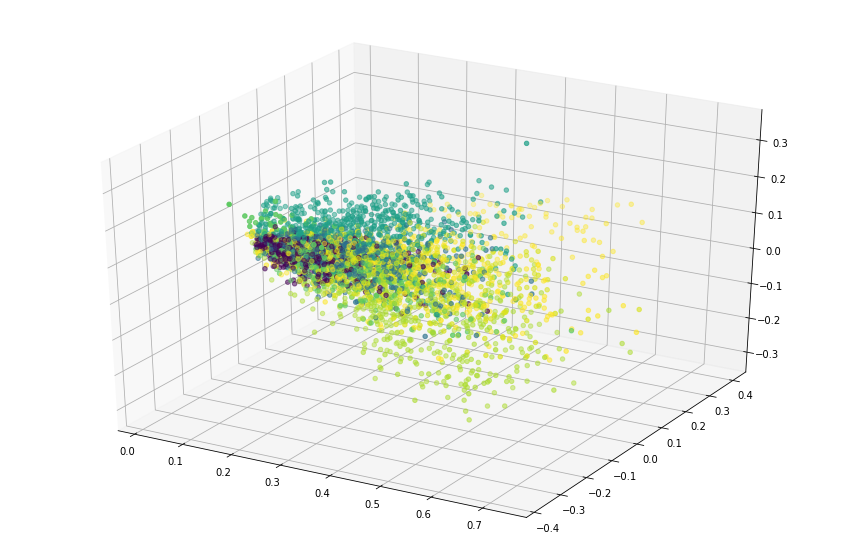

In [157]:
#babyplots not working here
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(train_svd[:,0],train_svd[:,1],train_svd[:,2],c=train_y)
plt.show()

# 4. Kmeans clustering



In this part we are going to perform KMeans clustering on the generated embeddings of our training dataset. One major challenge with KMeans is to find the optimum number of clusters to use for clustering. Here, based on our training data, we know that there are 7 clusters in the dataset. However, we want to find the number of optimum clusters solely based on our data. In this part we are going to use [`average silhouette coefficient`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to evaluate our clustering


## 4.1. clustering and evaluation

**4.1.1** What is the range of possible values of silhouette coefficients? <br>
**4.1.2** Describe what a silhouette score of -1 and 1 mean?<br>
**4.1.3.** Use `silhouette score` and `KMeans` from sklearn library to find the optimum number of clusters in your `train_umap`. Don't forget to use `SEED` as your kmeans `random_seed`. In order to do this try different values of cluster numbers from 5 to 20. Choose the one that results in the best score. <br>
**4.1.4.** Plot silhouette score for different values of `n_clusters` (a plot with `n_clusters` on the x-axis and silhouette score on the y-axis) and find the best value for `n_cluster`. Don't forget to put the plot in your report.

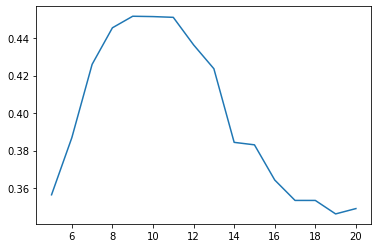

The best number of clusters: 9
CPU times: user 18.9 s, sys: 2.51 s, total: 21.5 s
Wall time: 16 s


In [78]:
%%time

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_clustering_scores(train_vectors) -> KMeans:
    """
    This function calculates KMeans model for different values of n_cluster and calculates silhouette score
    for each of them. Then it returns a list of silhouette scores
    RETURNS: 
        list of scores
    """
    # YOUR CODE
    clustering_scores = []
    n_clusters_ranges = [i for i in range(5,21)]
    for n in n_clusters_ranges:
      kmeans = KMeans(n_clusters = n , random_state = SEED)
      kmeans_labels = kmeans.fit_predict(train_vectors)

      silhouette_avg = silhouette_score(train_vectors, kmeans_labels)
      clustering_scores.append(silhouette_avg)
    return clustering_scores

clustering_scores = get_clustering_scores(train_umap)

## plot scores
# YOUR CODE
plt.plot([n for n in range(5,21)],clustering_scores)
plt.show()

## Find best number of clusters
# YOUR CODE
print('The best number of clusters:',clustering_scores.index(max(clustering_scores))+5)

## 4.2. Making a kmeans classifier

Now that we have the best number of clusters, run KMeans again with the best number of clusters associated with the best sihouette score (on `train_umap`). 

After running KMeans you get some number of clusters but each of them have some cluster label that does not necessarily match the trainig labels. Try to implement `get_cluster_mapping` function that inputs your KMeans model and the training labels and returns a dictionary that maps each of the cluster labels to one of the training labels. For example your cluster 0 might correspond to training label of 17.

Hint: In your `get_cluster_mapping` function, find the training label of the majority of data points in each cluster. For example, if your cluster 0 contains 100 data points of label 12 and 5 data points of label 15, the majority of data points in cluster 0 come from label 12. Therefore, your output dictionary should contain the mapping `0: 12`

**4.2.1** show your mapping (resulted dictionary) inside your project report.


In [33]:

# Run KMeans again with best parameter you calculated in the previous section
# YOUR CODE HERE
kmeans = KMeans(n_clusters=9,random_state = SEED)
clustering = kmeans.fit_predict(train_umap)
###


def get_cluster_mapping(clustering: KMeans, original_labels):
    """
    input: a clustering and original labels of the data
    returns: a dictionary that maps each cluster number to an original label
    """
    # YOUR CODE HERE
    cluster_mapping = {}
    for i in range(len(clustering)):
      cluster_mapping[clustering[i]] = original_labels[i] 
    return cluster_mapping 

# Feed the generated kmeans clustering and your training labels to the following function
cluster_mapping = get_cluster_mapping(clustering, train_y)
print(cluster_mapping)

{8: 7, 5: 1, 4: 16, 1: 10, 3: 17, 2: 15, 0: 13, 7: 17, 6: 15}


## 4.3. Analyzing clusters

**4.3.1.** Are there any two clusters in your clustering output with the same training label (for example, are there two clusters which both have same training label)? Use your visualizations and describe why?<br>
**4.3.2.** Write the function bellow that returns nearest samples to a cluster center. Use this function and explain why there are overlaps in your labels? <br>
**4.3.3.** Can you infere the overlapping label(s) by checking out most central samples? check with original labels.<br>

In [263]:
centers = kmeans.cluster_centers_
centers

array([[ 4.608291  , -0.8481127 ,  2.1325612 ],
       [ 2.3677313 , -3.5976057 ,  5.4162636 ],
       [ 2.4580123 , -2.1078818 ,  2.7245712 ],
       [-0.11384273,  1.2284979 ,  4.7488756 ],
       [ 3.4444788 ,  0.16113102,  5.056376  ],
       [ 0.379125  , -1.4802301 ,  4.069946  ],
       [12.922724  , -4.2282076 ,  2.3953352 ],
       [-0.32217908,  0.1145016 ,  1.7049601 ],
       [ 2.2377832 ,  0.2227428 ,  3.0460927 ]], dtype=float32)

In [267]:
from scipy.spatial.distance import cdist

def most_central_samples(clustering: KMeans, cluster_id, k=3):
    """
    returns the text of k most central samples in the specified cluster_id
    """
    # YOUR CODE
    #calculate distances of specified cluster_id
    centers = kmeans.cluster_centers_
    specified_data = []
    for i in range(len(clustering)):
      if clustering[i] == cluster_id:
        specified_data.append(train_umap[i])
    dist = cdist(centers, specified_data, metric='euclidean')
    id_dist = dist[cluster_id]
    #return k most central samples 
    central_samples=[]
    for i in range(k):
      central_samples.append(specified_data[np.argmin(id_dist)])
      id_dist = np.delete(id_dist,np.argmin(id_dist))
    return central_samples

central_samples = most_central_samples(clustering, 8)
print(central_samples)

central_samples = most_central_samples(clustering, 3,k=3)
print(central_samples)
central_samples = most_central_samples(clustering, 7,k=3)
print(central_samples)
central_samples = most_central_samples(clustering, 2,k=3)
print(central_samples)
central_samples = most_central_samples(clustering, 6,k=3)
print(central_samples)

[array([2.3556788 , 0.09245235, 3.066503  ], dtype=float32), array([ 2.8795347 , -0.35193533,  3.2534075 ], dtype=float32), array([2.6221027 , 0.93866146, 2.3808136 ], dtype=float32)]
[array([-0.12699232,  1.2860556 ,  4.6326923 ], dtype=float32), array([-0.14816086,  1.3478087 ,  4.8102107 ], dtype=float32), array([-1.5482715 ,  0.73476696,  6.273572  ], dtype=float32)]
[array([-0.30121598,  0.10842459,  1.7587736 ], dtype=float32), array([-0.3798152 ,  0.09612282,  1.8144052 ], dtype=float32), array([-0.06344778, -0.06665345,  1.6088219 ], dtype=float32)]
[array([ 2.4926655, -2.165534 ,  2.7762668], dtype=float32), array([ 3.818258 , -3.1467025,  3.4250042], dtype=float32), array([ 3.1024683 , -2.471598  ,  0.95497966], dtype=float32)]
[array([12.923173 , -4.2277737,  2.3949456], dtype=float32), array([12.924031 , -4.2279305,  2.394569 ], dtype=float32), array([12.925134 , -4.2292385,  2.3958783], dtype=float32)]


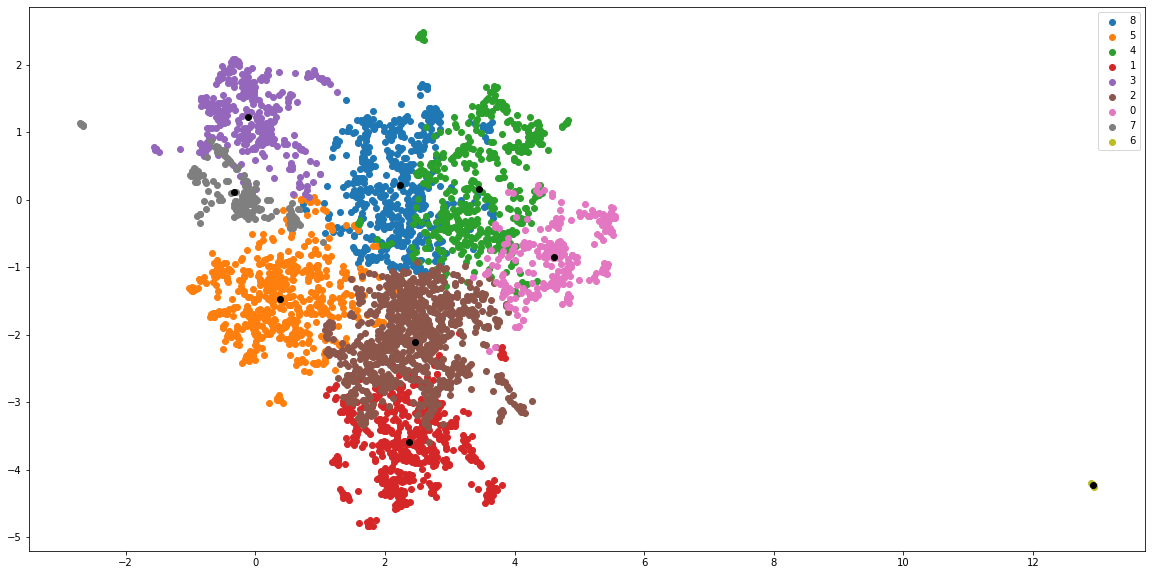

In [97]:
from matplotlib.pyplot import figure

figure(figsize=(20,10))
centroids = kmeans.cluster_centers_
for i in cluster_mapping.keys():
    plt.scatter(train_umap[clustering==i,0] , train_umap[clustering==i,1] ,label=i)
plt.scatter(centroids[:,0] , centroids[:,1] ,color = 'black')
plt.legend()
plt.show()

## 4.4. evaluate your kmeans model on test dataset

**4.4.1.** Using the generated mapping, and your clustering model, predict the labels of test dataset (you can use the embeddings of test data that you generated by umap `test_umap`) <br>
**4.4.2.** Calculate the accuracy of model <br>
**4.4.3.** Calculate both micro and macro values of precision, recall and F1 score <br>

In [39]:
cluster_mapping

{0: 13, 1: 10, 2: 15, 3: 17, 4: 16, 5: 1, 6: 15, 7: 17, 8: 7}

In [43]:
# YOUR CODE HERE
#code for 4.4.1
y_pred = kmeans.predict(test_umap)
mapped_y_pred = []
for data in y_pred:
  mapped_y_pred.append(cluster_mapping[data])
y_pred = np.array(mapped_y_pred)

#code for 4.4.2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('accuracy_score:',accuracy_score(y_pred,test_y))

#code for 4.4.3
print('micro precision_score:',precision_score(y_pred,test_y,average='micro'))
print('macro precision_score:',precision_score(y_pred,test_y,average='macro'))
print('micro recall_score:',recall_score(y_pred,test_y,average='micro'))
print('macro recall_score:',recall_score(y_pred,test_y,average='macro'))
print('micro f1_score:',f1_score(y_pred,test_y,average='micro'))
print('macro f1_score:',f1_score(y_pred,test_y,average='macro'))


accuracy_score: 0.7133922001471671
micro precision_score: 0.7133922001471671
macro precision_score: 0.7134572762589674
micro recall_score: 0.7133922001471671
macro recall_score: 0.7876341421262192
micro f1_score: 0.713392200147167
macro f1_score: 0.708034731948376


# **574 Only** 5.1 KNN classification

Using sklearn `KneighborsClassifier`, classify news data. Then, evaluate your model using the test set.

**5.1.1.** Train two seperate KNN models on both SVD and UMAP embeddings. Use `n_neighbors=100`. <br>
**5.1.2.** Evaluate your model on test datas (`test_umap` and `test_svd`). Which model performs better? Why? <br>
**5.1.3.** Calculate macro and micro precision recall and fscore for `test_umap`. Which one of the two do you prefer for evaluating your model? why? <br>
**5.1.4.** Shortly describe why the two sets of values (macro and micro) are so similar in this case. <br>

In [ ]:
#YOUR CODE
